<a href="https://colab.research.google.com/github/ph2eal/biblioteca_pandas_dnc/blob/main/RID_185775_Desafio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""Esse é o DESAFIO 4 DO CURSO ANALISTA DE DADOS
DA EMPRESA DNC: https://ed.escoladnc.com/. O foco do trabalho
é trabalhar numa base de dados de uma empresa que utiliza
redes sociais e jornais para gerar LEADS e vendas.
Para isso, há dados de retorno de vendas sobre investimentos
em YOUTUBE, FACEBOOK, JORNAIS.  O grande objetivo
é verificar quais investimentos geram maior retorno de vendas
e realizar um modelo preditivo (machine learning) em regressão linear
que possa prever ao final (de acordo com o grau de investimento
em cada canal) qual será o retorno de vendas."""


In [ ]:
# ETAPA 1 - ANÁLISE DESCRITIVA

import pandas as pd


In [ ]:
# 1.1. Definindo nome da base de dados

mkt = pd.read_csv('/content/MKT.csv')



In [ ]:
# 1.2. Entendendo os dados
mkt.head()

,"youtube,facebook,newspaper,sales"
0,"84.72,19.2,48.96,12.6"
1,"351.48,33.96,51.84,25.68"
2,"135.48,20.88,46.32,14.28"
3,"116.64,1.8,36,11.52"
4,"318.72,24,0.36,20.88"


In [ ]:
# 1.3. Renomeando os dados (colunas)

mkt= mkt.rename(columns={'newspaper':'jornal', 'sales':'retorno_vendas'})
mkt.head()

,youtube,facebook,jornal,retorno_vendas
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# 1.4. Descrição dos dados
mkt.describe()

# --> alto desvio-padrão nos investimentos do youtube
# --> média de retorno de vendas menos de 10% em relação à média de investimento no Youtube




,youtube,facebook,jornal,retorno_vendas
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
# 1.5. Verificar dados nulos
mkt.info()

# --> tem 171 entradas e 171 em cada coluna
# --> não tem dados nulos
# --> todos são do tipo float



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   youtube         171 non-null    float64
 1   facebook        171 non-null    float64
 2   jornal          171 non-null    float64
 3   retorno_vendas  171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
# ETAPA 2 - ANÁLISE EXPLORATÓRIA

import seaborn as sns
import matplotlib.pyplot as plt
%pip install plotly
%pip install cufflinks
import plotly.express as px

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.1 MB/s eta 0:00:00


In [ ]:
# 2.1. Descrição (BOX-PLOT) - Youtube
fig = px.box(mkt,x = 'youtube')
fig.update_layout(title='Investimento no Youtube')
fig.update_traces(line_color = "red")
fig.show()

# --> 1o. quartil (25%) (até próximo de R$90,84 de investimento) e último quartil
# (75%) acima de R$ 263,37)




In [ ]:
# 2.2. Descrição (BOX-PLOT) - Facebook
fig = px.box(mkt,x = 'facebook')
fig.update_layout(title='Investimento no Facebook')
fig.update_traces(line_color = "blue")
fig.show()

# --> 1o. quartil (25%) (até próximo de R$11,61 de investimento) e último quartil
# (75%) acima de R$ 43,74)

In [ ]:
# 2.3. Descrição (BOX-PLOT) - Jornal
fig = px.box(mkt,x = 'jornal')
fig.update_layout(title='Investimento em jornais')
fig.update_traces(line_color = "black")
fig.show()

# --> 1o. quartil (25%) (até próximo de R$13,50 de investimento) e último quartil
# (75%) acima de R$ 51,24)

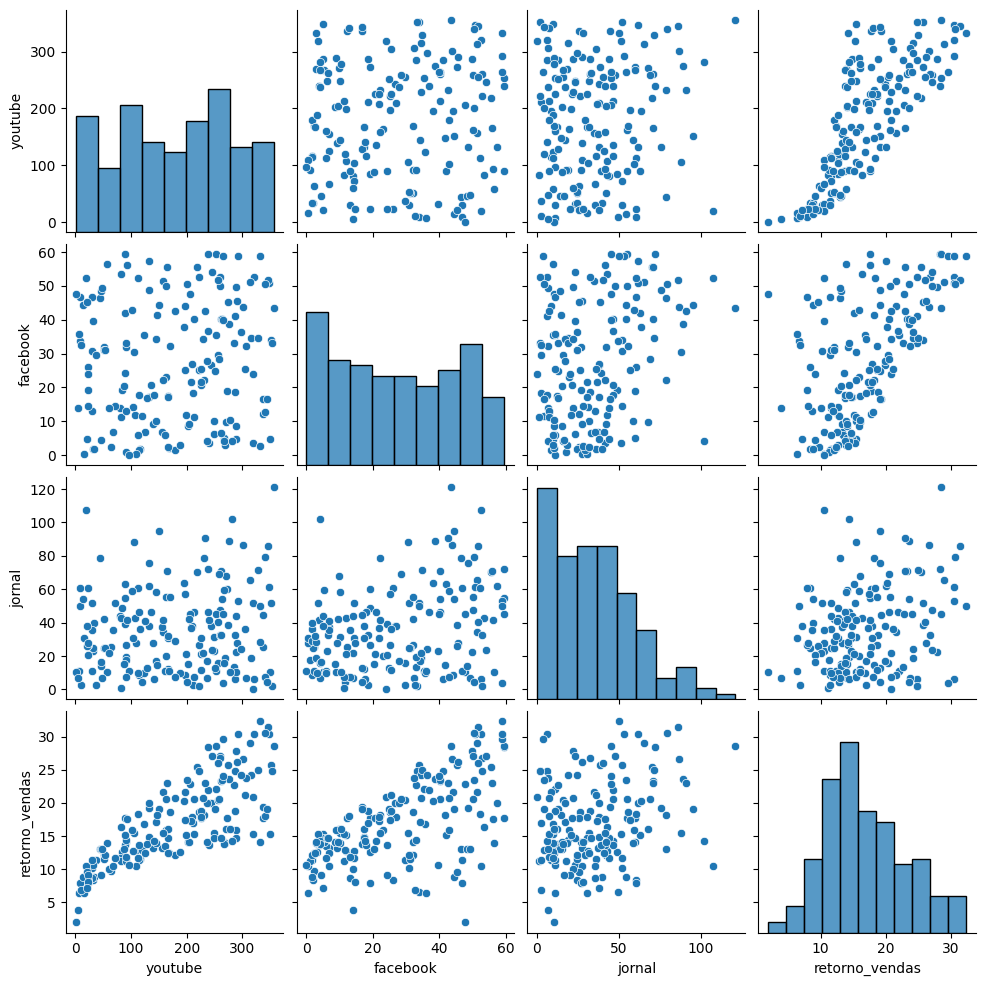

In [ ]:
# 2.4. Visualização das correlações entre as variáeis
import seaborn as sns
sns.pairplot (mkt)

# --> A princípio, parece haver uma correlação positiva (+)
# entre:
# x (youtube) e y (retorno de vendas)
# x (facebook) e y (retorno de vendas)
# maior dispersão sem correlação visual entre
# x (jornal) e y (retorno de vendas)

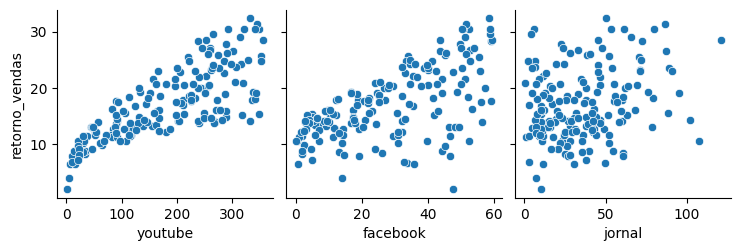

In [ ]:
# 2.5. Visualização de verificação real das correlações entre as variáveis
# independentes - x (youtube, facebook e jornal) com a variável
# dependente - y (retorno_vendas)

mkt.columns.tolist()

sns.pairplot (mkt, x_vars=['youtube', 'facebook', 'jornal'], y_vars ='retorno_vendas');

In [ ]:
# 2.6. Verificação da correlação real (r) entre as variáveis
# independentes - x (youtube, facebook e jornal) com a variável
# dependente - y (retorno_vendas)

mkt.corr()

# --> a maior correlação de retorno de vendas
# é r = 0,78 e ocorre com investimentos no
# youtube, seguido do facebook (r = 0,60)
# e baixa correlação (r= 0,25) de retorno
# de vendas a partir do investimento em jornais

,youtube,facebook,jornal,retorno_vendas
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
jornal,0.110759,0.293425,1.000000,0.254987
retorno_vendas,0.782030,0.602918,0.254987,1.000000


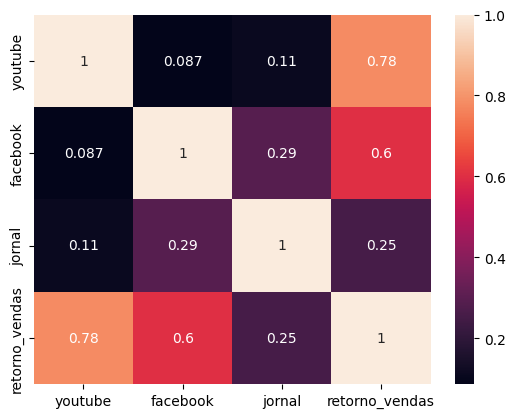

In [ ]:
# 2.6. Verificação visual (heatmap) da correlação real (r) entre as variáveis
# independentes - x (youtube, facebook e jornal) com a variável
# dependente - y (retorno_vendas)

sns.heatmap(mkt.corr(), annot=True);

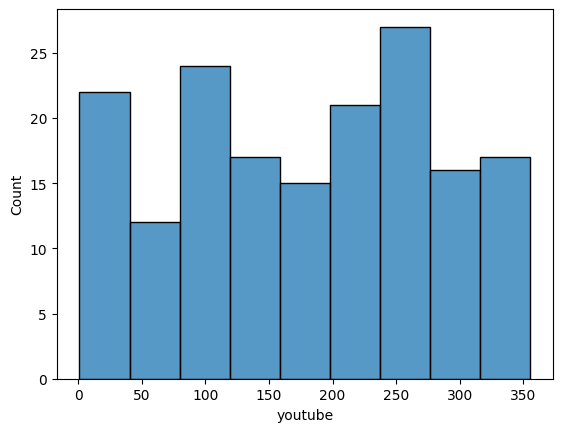

In [ ]:
# 2.7. Distribuição normal das variáveis
# 2.7.1. (youtube)

sns.histplot (mkt["youtube"]);

# Distribuição não normal

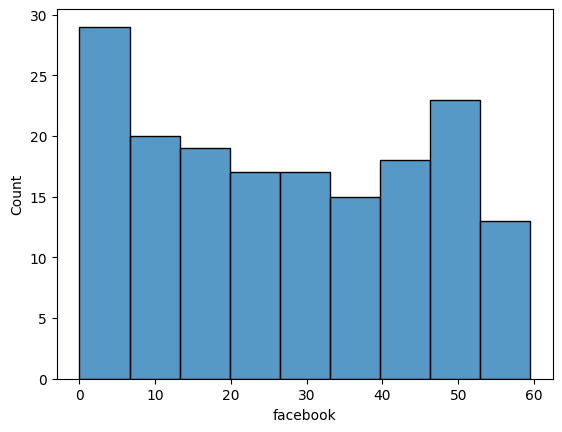

In [ ]:
# 2.7. Distribuição normal das variáveis
# 2.7.2. (facebook)

sns.histplot (mkt["facebook"]);

# Distribuição não normal

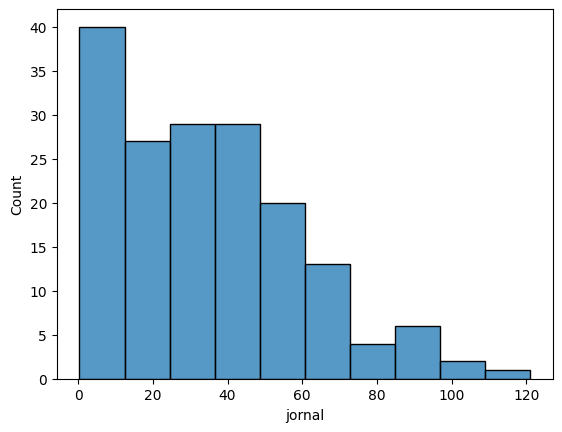

In [ ]:
# 2.7. Distribuição normal das variáveis
# 2.7.3. (jornal)

sns.histplot (mkt["jornal"]);



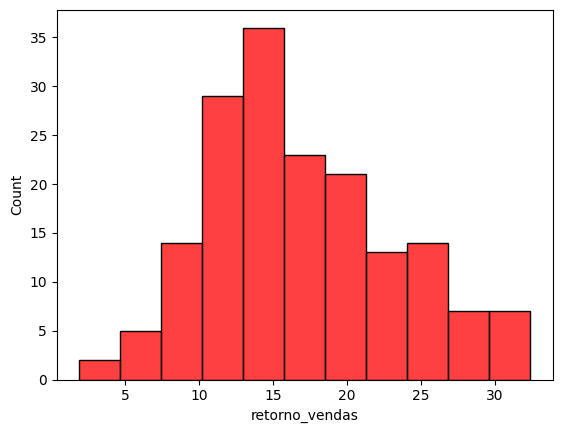

In [ ]:
# 2.7. Distribuição normal das variáveis
# 2.7.4. (retorno_vendas)

sns.histplot (mkt["retorno_vendas"], color = "red");

# Distribuição normal

In [ ]:
# 2.8. Separação das variáveis
# independentes - x (youtube, facebook e jornal) com a variável
# dependente - y (retorno_vendas)

x = mkt[['youtube', 'facebook', 'jornal']]
y = mkt['retorno_vendas']

In [ ]:
# ETAPA 3 - MODELAGEM

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# 3.1. Criar x train, x test, y train e y test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=42)


In [ ]:
# 3.2. Imprimir a nova base de dados
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

# --> 51 dados em x_train e y_train
# --> 120 dados em x_test e y_test

(51, 3)
(120, 3)
(51,)
(120,)


In [ ]:
# 3.3. Treinar o modelo
from sklearn.linear_model import LinearRegression


In [ ]:
# 3.4. Definir nova variável para regressão linear
modelo = LinearRegression()


In [ ]:
# 3.5. Treinar o modelo com as novas variáveis de treino (train)
modelo.fit(x_train, y_train)

LinearRegression()

In [ ]:
# 3.6. Predizer base de teste
y_pred = modelo.predict(x_test)

In [ ]:
# ETAPA 4 - CALCULANDO PREDIÇÃO

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r = r2_score (y_test,y_pred)

In [ ]:
# 4.1. Imprimir r quadrado
print ("r_quadrado é:", r)

# r quadrado bem próximo de 1,0 o que significa que o modelo
# de regressão linear é bem explicado

r_quadrado é: 0.8947793194383772


In [ ]:
# 4.2. Tamanho de dados

mkt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   youtube         171 non-null    float64
 1   facebook        171 non-null    float64
 2   jornal          171 non-null    float64
 3   retorno_vendas  171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


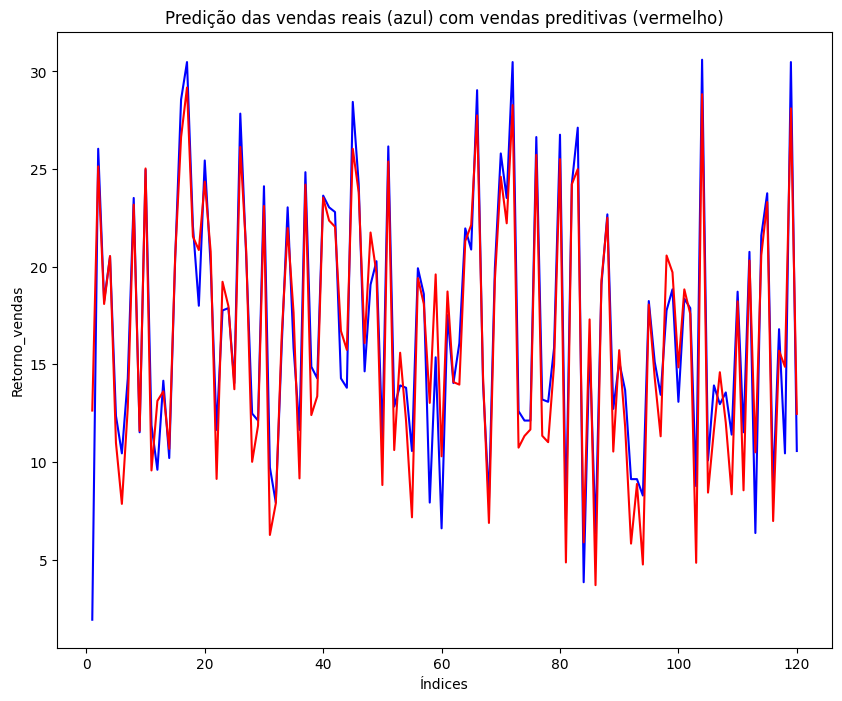

In [ ]:
# 4.2. Plotar resultado real e preditivo

d = [i for i in range(1,121,1)]
fig = plt.figure(figsize = (10,8))

# base original (azul)
plt.plot(d,y_test, color="blue", linewidth = 1.5)

# base preditiva (vermelho)
plt.plot(d,y_pred, color="red", linewidth = 1.5)

# definindo rótulos
plt.xlabel ('Índices')
plt.ylabel ('Retorno_vendas')
plt.title ('Predição das vendas reais (azul) com vendas preditivas (vermelho)')
plt.show()

# --> Retorno de vendas real (azul) é parcialmente bem
# explicado pelo retorno de vendas preditivo (vermelho)
# na maioria das vezes, com gráficos quase
# se sobrepondo

In [ ]:
# 4.3. Calcular retorno de vendas segundo parâmetros dados

facebook = float (input('Defina o valor de investimento para Facebook(R$)  ' ))
youtube = float (input('Defina o valor de investimento para Youtube (R$)  ' ))
jornal = float (input ('Defina o valor de investimento para jornais (R$)  ' ))

retorno_vendas = [[facebook,youtube,jornal]]

print ('O retorno de vendas será de R$ :' , modelo.predict(retorno_vendas)[0])


# Exemplo: Investimento total: R$ 700,00 - VERIFICAR O RETORNO
# Investimento Facebook: R$ 200,00
# Investimento Youtube: R$ 400,00 (o dobro, pois tem maior
# correlação com retorno_vendas)
# Investimento jornais: R$ 100,00  (pois tem menor
# correlação com retorno_vendas)

# RETORNO TOTAL: R$ 94,55

# Exemplo: Investimento total: R$ 700,00 - VERIFICAR O RETORNO
# Investimento Facebook: R$ 200,00
# Investimento Youtube: R$ 500,00 (o dobro, pois tem maior
# correlação com retorno_vendas)
# Investimento jornais: R$ 0,00 (pois tem menor
# correlação com retorno_vendas)

# RETORNO TOTAL: R$ 114,79


# CONCLUSÃO: Investir mais em Youtube, pois tem maior
# retorno sobre as vendas (maior r2) que os demais.


Defina o valor de investimento para Facebook(R$)  200
Defina o valor de investimento para Youtube (R$)  500
Defina o valor de investimento para jornais (R$)  0
O retorno de vendas será de R$ : 114.79146093515321


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

